# Lab 2: Data Preparation

Task: Data Pre-Processing of the bank data set
<br>
<br>
- Encoding of all categorical attributes as numerical attributes
<br>
<br>
- Filling all missing values 
<br>
<br>
- Applying scaler to rescale features 
<br>
<br>
- Handling outliers appropriately
<br>
<br>
- Creating at least one new feature from the existing ones 
<br>
<br>
- Saving the prepared dataset as a CSV file

## Known Issues

While exploring the bank data set, we discovered a few issues.
<br>
<br>
- There are missing values in the following columns: age, job, education, contact
<br>
<br>
- When correlating job and balance, there are some extreme values for the attribute balance. For example, the most extreme balance belongs to a retired person with secondary education and housemaid earns almost the same as a manager.
<br>
<br>
- Most of the clients are between late 20s and 40s. There are few people that are older.
<br>
<br>
- Most of the clients have been contacted once during the campaign. The attribute campaign has some extreme values.

## A. Import Python Modules and Dataset 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(r"/Users/steffipoliwoda/Desktop/bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


I will check for missing values.

In [2]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

The following attributes have missing data: age (12), job (10), education (104), contact (191) and poutcome (454).
<br>
<br>
Age is a numberical attribute and the remaining ones are categorical attributes.

I will make a copy of the data set.

In [3]:
df_original = df

## B. Processing and Encoding of Categorical Attributes

I can't drop any column, because they all contain useful information.

### Encoding of Ordinal Categorical Attributes

Almost all categorical columns (job, marital, default, housing, loan, cellular, failure, and subscribed) are nominal. There is only education and month which are ordinal under the categorical columns.

In [4]:
# Create a mapper for education

scale_mapper = {
    "primary": 1,
    "secondary": 2,
    "tertiary": 3
}

df['education'] = df['education'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
# Create a mapper for month 
month_scale_mapper = { 
    "jan": 1, 
    "feb": 2, 
    "mar": 3, 
    "apr": 4, 
    "may": 5, 
    "jun": 6,     
    "jul": 7, 
    "aug": 8, 
    "sep": 9, 
    "oct": 10, 
    "nov": 11, 
    "dec": 12, } 
df['month'] = df['month'].replace(month_scale_mapper) 

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


### One-Hot Encoding for All Other Categorical Attributes

I will one-hot the attributes contact, job, and poutcome with NaN.
<br>
<br>
I won't eliminate the 454 missing values for poutcome yet. All missing values are related pdays = -1 and previous = 0. The value - 1 for the attribute pdays (number of days that passed by after the client was last contacted from a previous campaign) means that the value is missing. The value 0 for previous (number of contacts performed before this campaign and for this client) means that the value is missing. Therefore, since the number of contacts performed this campaign and the number of days that passed by are unknown, the outcome of the previous marketing campaign is unknown.

In [6]:
# first one-hot encode the categorical columns job and contact with NaNs

df = pd.get_dummies(df, columns=['contact','job', 'poutcome'],
                        dummy_na=True,
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,9,327,...,0,0,0,1,0,0,0,0,0,1
1996,28.0,single,2.0,no,127,no,no,16,9,1334,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,1.0,no,1154,no,no,17,9,231,...,1,0,0,0,0,0,0,0,0,1
1998,46.0,married,1.0,no,4343,yes,no,20,9,185,...,0,0,1,0,0,0,0,0,0,1
1999,40.0,married,2.0,no,6403,no,no,22,9,208,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# now one-hot encode the categorical attributes marital, default, housing and loan

df = pd.get_dummies(df, columns=['marital','default', 'housing', 'loan', 'subscribed'],
                        dummy_na=True,
                        drop_first=True)
df.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,contact_telephone,...,marital_single,marital_nan,default_yes,default_nan,housing_yes,housing_nan,loan_yes,loan_nan,subscribed_yes,subscribed_nan
1995,20.0,NaN,2785,16,9,327,2,-1,0,0,...,1,0,0,0,0,0,0,0,1,0
1996,28.0,2.0,127,16,9,1334,2,-1,0,0,...,1,0,0,0,0,0,0,0,1,0
1997,81.0,1.0,1154,17,9,231,1,-1,0,1,...,0,0,0,0,0,0,0,0,1,0
1998,46.0,1.0,4343,20,9,185,1,-1,0,0,...,0,0,0,0,1,0,0,0,1,0
1999,40.0,2.0,6403,22,9,208,2,-1,0,0,...,0,0,0,0,0,0,0,0,1,0


## C. Handling of Missing Values for Numerical Attributes

In [8]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
contact_telephone      0
contact_nan            0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
marital_nan            0
default_yes            0
default_nan            0
housing_yes            0
housing_nan            0
loan_yes               0
loan_nan               0
subscribed_yes         0
subscribed_nan         0
dtype: int64

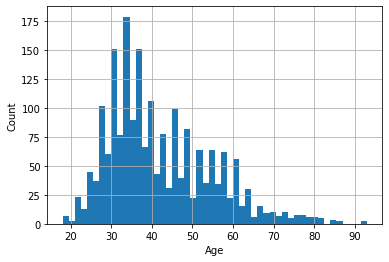

The number of values in the Age attribute is 2000
The mean age is 42 years
The median age is 38 years
The median age is 0    33.0
dtype: float64 years


In [9]:
# Histogram of age attribute

df['age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

df['age'].fillna(df['age'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True) 
df['age'].fillna(df['age'].mode(), inplace=True)
 
print('The number of values in the Age attribute is',df['age'].count()) 
print('The mean age is', round(df['age'].mean()), 'years') 
print('The median age is', round(df['age'].median()), 'years') 
print('The median age is', round(df['age'].mode()), 'years') 

As confirmed last week, the attribute age does not have obvious correlation with other attributes. Therefore, I can use mean, median and mode, because there are no obvious correlations. I need to find whether I should use the mean or median to replace the missing values. Since the age attribute does have outliers, I will use the median to replace the missing values. 

In [10]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                    0
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
contact_telephone      0
contact_nan            0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
marital_nan            0
default_yes            0
default_nan            0
housing_yes            0
housing_nan            0
loan_yes               0
loan_nan               0
subscribed_yes         0
subscribed_nan         0
dtype: int64

In [11]:
ptable = df.pivot_table(values='age',
                        index='marital_married',
                        columns='marital_single',
                        aggfunc=np.median)

In [12]:
df['education'].fillna(df['education'].median(), inplace=True)

In [13]:
# Check that there are no nulls/NaNs in the dataset

df.isna().sum()

age                  0
education            0
balance              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
contact_telephone    0
contact_nan          0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
marital_married      0
marital_single       0
marital_nan          0
default_yes          0
default_nan          0
housing_yes          0
housing_nan          0
loan_yes             0
loan_nan             0
subscribed_yes       0
subscribed_nan       0
dtype: int64

In [14]:
# Replace -1 with 0
df['pdays'] = df['pdays'].replace(-1, 0)

In [15]:
df['pdays'].fillna(df['pdays'].median(), inplace=True)

In [16]:
df.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,contact_telephone,...,marital_single,marital_nan,default_yes,default_nan,housing_yes,housing_nan,loan_yes,loan_nan,subscribed_yes,subscribed_nan
1995,20.0,2.0,2785,16,9,327,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1996,28.0,2.0,127,16,9,1334,2,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1997,81.0,1.0,1154,17,9,231,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1998,46.0,1.0,4343,20,9,185,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1999,40.0,2.0,6403,22,9,208,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# D. Rescaling Features

In [17]:
# Use `RobustScaler` to the attributes that have outliers
robust_scaler = RobustScaler()
df[['age','balance', 
    'duration', 'campaign', 'pdays', 'previous']] = robust_scaler.fit_transform(df[['age','balance', 
                                'duration', 'campaign', 'pdays', 'previous']])

In [18]:
# Bring other attibutes withot outliers into the interval [0,1] by dividing by the max value
# day ranges from 1-31 so I subtract 1 from day before dividing by 30 so that 0 is day 1
df['education'] = df['education']/2
df['day'] = (df['day']-1)/30
df['month'] = df['month']/11

## Handling of Outliers

Last week we observed that balance contains some extreme values. I will look at the box plot of balance to verify that it has outliers.

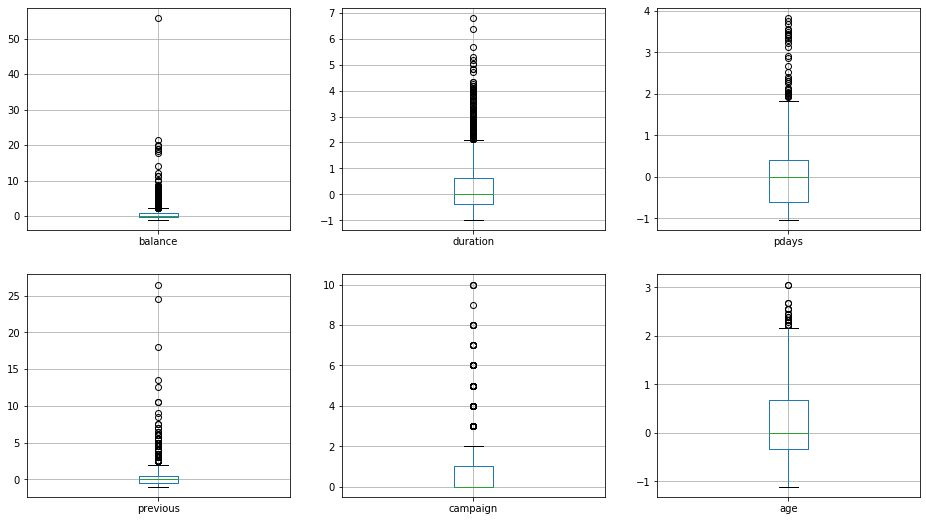

In [19]:
# Create figure with five subplots
fig = plt.figure(figsize=(16,9))

# Plot balance
bp1 = fig.add_subplot(2, 3, 1)
df.boxplot(column=['balance'])

# Plot duration
bp2 = fig.add_subplot(2, 3, 2)
df.boxplot(column=['duration'])

# Plot pdays
bp3 = fig.add_subplot(2, 3, 3)
df.boxplot(column=['pdays'])

# Plot duration
bp4 = fig.add_subplot(2, 3, 4)
df.boxplot(column=['previous'])

# Plot pdays
bp5 = fig.add_subplot(2, 3, 5)
df.boxplot(column=['campaign'])

# Plot pdays
bp6 = fig.add_subplot(2, 3, 6)
df.boxplot(column=['age'])


plt.show()

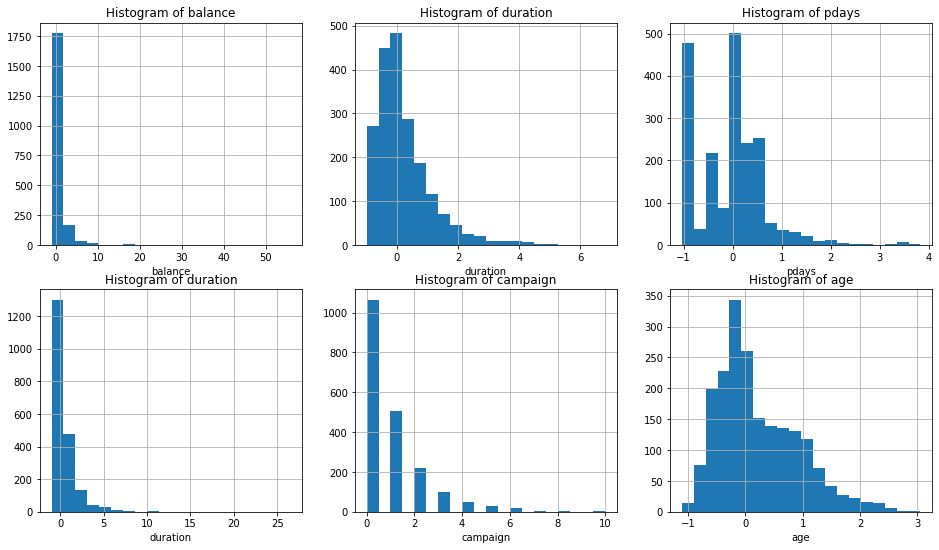

In [20]:
# Create figure with five histograms
fig = plt.figure(figsize=(16,9))

# Plot balance
hs1 = fig.add_subplot(2, 3, 1)
hs1.set_title("Histogram of balance")
hs1.set_xlabel('balance')
df['balance'].hist(bins=20)

# Plot duration
hs2 = fig.add_subplot(2, 3, 2)
hs2.set_title("Histogram of duration")
hs2.set_xlabel('duration')
df['duration'].hist(bins=20)

# Plot pdays
hs3 = fig.add_subplot(2, 3, 3)
hs3.set_title("Histogram of pdays")
hs3.set_xlabel('pdays')
df['pdays'].hist(bins=20)

# Plot duration
hs4 = fig.add_subplot(2, 3, 4)
hs4.set_title("Histogram of duration")
hs4.set_xlabel('duration')
df['previous'].hist(bins=20)

# Plot campaign
hs5 = fig.add_subplot(2, 3, 5)
hs5.set_title("Histogram of campaign")
hs5.set_xlabel('campaign')
df['campaign'].hist(bins=20)

# Plot age
hs6 = fig.add_subplot(2, 3, 6)
hs6.set_title("Histogram of age")
hs6.set_xlabel('age')
df['age'].hist(bins=20)

plt.show()

The histogram is skewed. I will find the minimum values in this column.

In [21]:
df[['balance', 'duration', 'campaign', 'pdays', 'previous']].min()

balance    -1.060984
duration   -0.982833
campaign    0.000000
pdays      -1.038516
previous   -1.000000
dtype: float64

In [22]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance']+2.06)
df['duration'] = np.log(df['duration']+1.98)
df['campaign'] = np.log(df['campaign']+1)
df['pdays'] = np.log(df['pdays']+2.04)
df['previous'] = np.log(df['previous']+2)

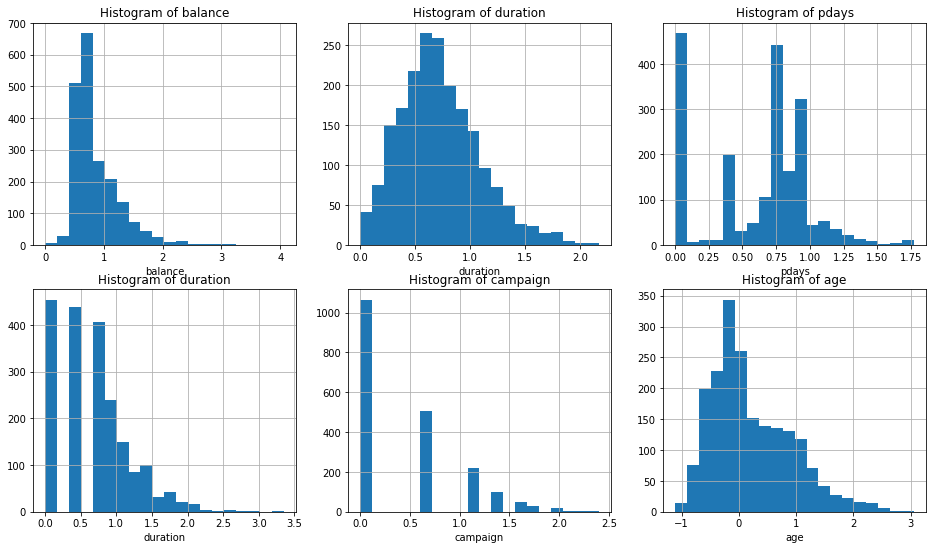

In [23]:
# Create figure with five histograms
fig = plt.figure(figsize=(16,9))

# Plot balance
hs1 = fig.add_subplot(2, 3, 1)
hs1.set_title("Histogram of balance")
hs1.set_xlabel('balance')
df['balance'].hist(bins=20)

# Plot duration
hs2 = fig.add_subplot(2, 3, 2)
hs2.set_title("Histogram of duration")
hs2.set_xlabel('duration')
df['duration'].hist(bins=20)

# Plot pdays
hs3 = fig.add_subplot(2, 3, 3)
hs3.set_title("Histogram of pdays")
hs3.set_xlabel('pdays')
df['pdays'].hist(bins=20)

# Plot duration
hs4 = fig.add_subplot(2, 3, 4)
hs4.set_title("Histogram of duration")
hs4.set_xlabel('duration')
df['previous'].hist(bins=20)

# Plot campaign
hs5 = fig.add_subplot(2, 3, 5)
hs5.set_title("Histogram of campaign")
hs5.set_xlabel('campaign')
df['campaign'].hist(bins=20)

# Plot age
hs6 = fig.add_subplot(2, 3, 6)
hs6.set_title("Histogram of age")
hs6.set_xlabel('age')
df['age'].hist(bins=20)

plt.show()

# D. Creating derived Features

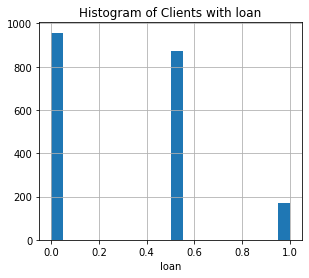

In [24]:
# Create a new feature 'loan' as the sum of housing loan and personal loan
df['loan'] = (df['housing_yes'] + df['loan_yes'])
df['loan'] = df['loan']/2

# Plot loan
fig = plt.figure(figsize=(16,4))
hs7 = fig.add_subplot(1, 3, 1)
hs7.set_title("Histogram of Clients with loan")
hs7.set_xlabel('loan')
df['loan'].hist(bins=20)

If we assume that single, widowed and divorced clients are not married, then anyone who is in either of these categories can be considered to be not married, and assume that any other client is considered to be married.
The following creates a derived feature married based on this notion.

In [25]:
# Create a derived field 'married' which is 1 if the persons is married and 0 if the person is not married
# Since df no longer has a 'marital' field we need to use the df_original copy.
df_original ['married'] = np.where(((df_original.marital != 'single') & (df_original.marital != 'divorced') & (df_original.marital != 'widowed')), 1, 0)
df['married'] = df_original['married']
df['married'].value_counts()

1    1111
0     889
Name: married, dtype: int64

If we assume that students, retired persons and unemployed person are not employedd, then anyone who is in either of these categories can be considered to be not employed, and assume that any other client is considered to be employed. The following creates a derived feature employed based on this notion.

In [26]:
# Create a derived field 'employed' which is 1 if the persons' job is not 'student', 'retired' or 'unemployed'
# Since df no longer has a 'job' field we need to use the df_original copy.
df_original['employed'] = np.where(((df_original.job != 'student') & (df_original.job != 'retired') & (df_original.job != 'unemployed')), 1, 0)
df['employed'] = df_original['employed']
df['employed'].value_counts()

1    1673
0     327
Name: employed, dtype: int64

# Saving the Dataset

In [28]:
df.to_csv('bank_prepared.csv')